In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xuesong/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
df =pd.read_csv('Data/train.csv')

### Check any Null Values in the dataframe

In [42]:
df=df.dropna()
messeges =df.copy()
messeges.reset_index(inplace=True)

corpus = []
for i in range(0, len(messeges)):
    review = re.sub('[^a-zA-Z]', ' ', messeges['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [50]:
# Counter Vectorization
# Bag of Words

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [53]:
y=messeges['label']

In [54]:
# Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [57]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
# Mulinomial Naive Bayes Theorem
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


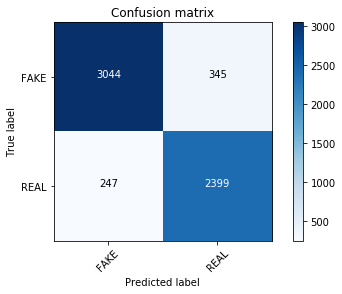

In [61]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [62]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [76]:
# Multinomial Classifier with Hyperparameter
classifier=MultinomialNB(alpha=0.1)
previous_score=0
highestAlpha = 0
highestscore = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    if score>highestscore:
        highestAlpha = alpha
        highestscore = score
    previous_score = score
    print("Alpha: {}, Score : {}".format(alpha,score))
print("Highest Alpha: {}, Score : {}".format(highestAlpha,highestscore))

/Users/xuesong/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255
Highest Alpha: 0.2, Score : 0.9025683512841757


In [66]:
# GaussianNB Naive Bayes Theorem
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.732
Confusion matrix, without normalization


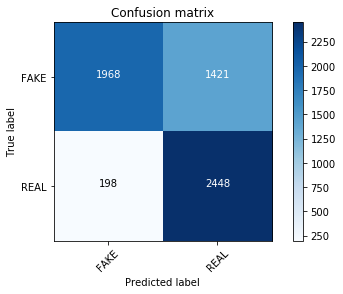

In [67]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [68]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7317315658657829

In [69]:
# BernoulliNB Naive Bayes Theorem
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


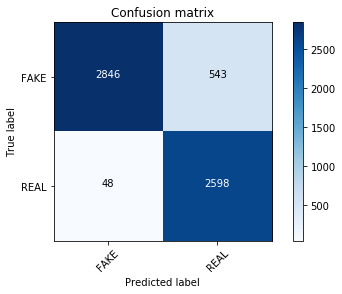

In [70]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [71]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9020712510356255

In [78]:
# BernoulliNB Classifier with Hyperparameter

classifier=BernoulliNB(alpha=0.1)
previous_score=0
highestAlpha = 0
highestscore = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier=BernoulliNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    if score>highestscore:
        highestAlpha = alpha
        highestscore = score
    previous_score = score
    print("Alpha: {}, Score : {}".format(alpha,score))
print("Highest Alpha: {}, Score : {}".format(highestAlpha,highestscore))

/Users/xuesong/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8987572493786247
Alpha: 0.1, Score : 0.9082021541010771
Alpha: 0.2, Score : 0.9075393537696769
Alpha: 0.30000000000000004, Score : 0.9057166528583265
Alpha: 0.4, Score : 0.9047224523612262
Alpha: 0.5, Score : 0.904059652029826
Alpha: 0.6000000000000001, Score : 0.9032311516155758
Alpha: 0.7000000000000001, Score : 0.9028997514498758
Alpha: 0.8, Score : 0.9024026512013256
Alpha: 0.9, Score : 0.9020712510356255
Highest Alpha: 0.1, Score : 0.9082021541010771


accuracy:   0.908
Confusion matrix, without normalization


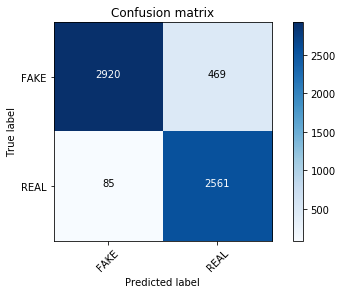

In [82]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])